In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.layers import LSTM 
from keras.layers import Embedding, Activation, Dense, Dropout, Input

In [5]:
df = pd.read_csv('C://Users/Saba Naseem/Desktop/Machine Learning/Codes/Emotion Analysis/Emotion-Detector-master/ISEAR.csv', names=['result', 'text', 'extra'])
df.head()

,result,text,extra
0,joy,On days when I feel close to my partner and ot...,NaN
1,fear,Every time I imagine that someone I love or I ...,NaN
2,anger,When I had been obviously unjustly treated and...,NaN
3,sadness,When I think about the short time that we live...,NaN
4,disgust,At a gathering I found myself involuntarily si...,NaN


In [6]:
df.drop(['extra'],axis=1, inplace=True)

In [7]:
df.head()

,result,text
0,joy,On days when I feel close to my partner and ot...
1,fear,Every time I imagine that someone I love or I ...
2,anger,When I had been obviously unjustly treated and...
3,sadness,When I think about the short time that we live...
4,disgust,At a gathering I found myself involuntarily si...


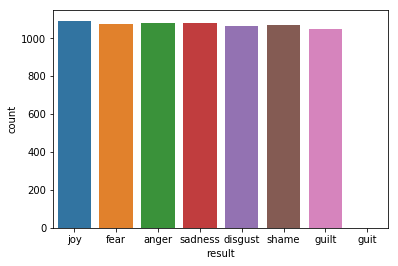

In [8]:
sns.countplot(df.result)

In [22]:
x, y = np.asarray(df['text']) , np.asarray(df['result'])
le = LabelEncoder()
y = le.fit_transform(y)
y= to_categorical(y)

In [24]:
y[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [25]:
xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size= 0.3, random_state=4)

In [26]:
xtrain.shape, xtest.shape

((5261,), (2255,))

In [27]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(xtrain)
sequences = tok.texts_to_sequences(xtrain)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [28]:
type(sequences_matrix), type(ytest)

(numpy.ndarray, numpy.ndarray)

In [29]:
sequences_matrix.shape, ytest.shape

((5261, 150), (2255, 8))

In [36]:
def model():
    
    model = Sequential()
    model.add(Embedding(1000,50,input_length=max_len))
    model.add(LSTM(64))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(8, activation='softmax'))
    
    model.compile(loss='binary_crossentropy', optimizer='rmsprop',metrics=['accuracy'])
    return model

In [37]:
m= model()

m.fit(sequences_matrix,ytrain,epochs=10, validation_split=0.2)

Train on 4208 samples, validate on 1053 samples
Epoch 1/10
4208/4208 [==============================] - 26s 6ms/step - loss: 0.3628 - acc: 0.8750 - val_loss: 0.3552 - val_acc: 0.8750
Epoch 2/10
4208/4208 [==============================] - 19s 5ms/step - loss: 0.3455 - acc: 0.8760 - val_loss: 0.3291 - val_acc: 0.8790
Epoch 3/10
4208/4208 [==============================] - 19s 4ms/step - loss: 0.3125 - acc: 0.8799 - val_loss: 0.2992 - val_acc: 0.8854
Epoch 4/10
4208/4208 [==============================] - 18s 4ms/step - loss: 0.2807 - acc: 0.8890 - val_loss: 0.2745 - val_acc: 0.8955
Epoch 5/10
4208/4208 [==============================] - 19s 4ms/step - loss: 0.2484 - acc: 0.9039 - val_loss: 0.2746 - val_acc: 0.8979
Epoch 6/10
4208/4208 [==============================] - 18s 4ms/step - loss: 0.2248 - acc: 0.9140 - val_loss: 0.2462 - val_acc: 0.9055
Epoch 7/10
4208/4208 [==============================] - 18s 4ms/step - loss: 0.2081 - acc: 0.9205 - val_loss: 0.2586 - val_acc: 0.9033
Epoch 8

In [38]:
test_sequences = tok.texts_to_sequences(xtest)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [40]:
accr = m.evaluate(test_sequences_matrix,ytest)

2255/2255 [==============================] - 4s 2ms/step


In [41]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.278
  Accuracy: 0.902
